# Index

# 1. Importing Libraries and Files

# 2. Assessing security implications

# 3.Customer behavior in different geographic areas

# 4. Create an exclusion flag for low-activity customers

# 5. Customer profiling 

# 6. Visualization to show the distribution of profiles

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

# 8. Comparisons - customer profiles with regions and departments

# 9. Suitable charts to illustrate results 

# 10. Export final data set

In [2]:
# 1. Imporsting Libraries and Files

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Path
path = r'C:\Users\35196\Documents\Alexandra\Data Analytics Program\02 Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [5]:
# Import the most up-to-date data (incl. customers data
ords_prods_custs_merge =pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_aggregated.pkl'))

In [6]:
# Checking data
ords_prods_custs_merge.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,473747,1,prior,3,3,12,21.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,431534,1,prior,5,4,15,28.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
ords_prods_custs_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   Unnamed: 0_x                   int64   
 1   order_id                       int64   
 2   user_id                        int64   
 3   eval_set                       object  
 4   order_number                   int64   
 5   order_dow                      int64   
 6   order_hour_of_day              int64   
 7   days_since_prior_order         float64 
 8   product_id                     int64   
 9   add_to_cart_order              int64   
 10  reordered                      int64   
 11  Unnamed: 0_y                   int64   
 12  product_name                   object  
 13  aisle_id                       int64   
 14  department_id                  int64   
 15  prices                         float64 
 16  price_range                    object  
 17  busiest_days             

In [8]:
# 2. Assessing security implications

The data contains sensitive data, first name and last name. This personal identificable information (PII) should be delete before continuing the analysis

In [9]:
ords_prods_custs_merge.drop(columns=['first_name', 'last_name'], inplace=True)

In [10]:
# Checking data after drop columns
ords_prods_custs_merge.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,473747,1,prior,3,3,12,21.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,431534,1,prior,5,4,15,28.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [11]:
ords_prods_custs_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   Unnamed: 0_x                   int64   
 1   order_id                       int64   
 2   user_id                        int64   
 3   eval_set                       object  
 4   order_number                   int64   
 5   order_dow                      int64   
 6   order_hour_of_day              int64   
 7   days_since_prior_order         float64 
 8   product_id                     int64   
 9   add_to_cart_order              int64   
 10  reordered                      int64   
 11  Unnamed: 0_y                   int64   
 12  product_name                   object  
 13  aisle_id                       int64   
 14  department_id                  int64   
 15  prices                         float64 
 16  price_range                    object  
 17  busiest_days             

In [12]:
# 3.Customer behavior in different geographic areas

In [13]:
# Creating new column called Region based on Northeast, Midwest, South and West group of states

In [14]:
ords_prods_custs_merge['state'].value_counts().sort_index()

state
Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
Ne

In [77]:
ords_prods_custs_merge.loc[ords_prods_custs_merge['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania','New Jersey']), 'region'] = 'Northeast'

In [78]:
ords_prods_custs_merge.loc[ords_prods_custs_merge['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana' , 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri' ]), 'region'] = 'Midwest'

In [79]:
ords_prods_custs_merge.loc[ords_prods_custs_merge['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas','Louisiana']), 'region'] = 'South'

In [80]:
ords_prods_custs_merge.loc[ords_prods_custs_merge['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [81]:
# Checking the new variable - region
ords_prods_custs_merge['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

South is the region with more users, followed by West and Midwest regions. Northeast is the region with less users.

In [20]:
# Difference in spending habits between the different US regions
# Create a crosstable
crosstab = pd.crosstab(ords_prods_custs_merge['region'], ords_prods_custs_merge['spender_flag'], dropna = False)

In [21]:
crosstab

spender_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [22]:
crosstab.to_clipboard()

Midwest and West regions have a similar behaviour in spending habits.
South region is the most representative region in terms of highest and lowest spending behaviours.
Northwest is the less representative region in this analysis.

In [23]:
# 4. Create an exclusion flag for low-activity customers and exclude them from the data

In [24]:
# low-activity customers are customers with less than 5 orders

In [25]:
ords_prods_custs_merge.loc[ords_prods_custs_merge['max_order']>=5, 'activity'] = 'high-activity'

In [26]:
ords_prods_custs_merge.loc[ords_prods_custs_merge['max_order']<5, 'activity'] = 'low-activity'

In [27]:
# Checking the new variable - activity
ords_prods_custs_merge['activity'].value_counts()

activity
high-activity    30964564
low-activity      1440295
Name: count, dtype: int64

In [28]:
# Define a new dataframe after excluding the low-activity customers
df = ords_prods_custs_merge.loc[ords_prods_custs_merge['activity'] == 'high-activity']

In [29]:
# Checking data
df['activity'].value_counts()

activity
high-activity    30964564
Name: count, dtype: int64

In [30]:
# Export the new dataframe as a a pickle file
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_custs_merge_highactivity.pkl'))

In [31]:
# 5. Customer profiling based on age, income, certain goods in the 'department_id' column and number of dependents (also use 'order_dow' and 'order_hour_of_day'
# checking data
df.shape

(30964564, 35)

In [32]:
df['age'].value_counts().sort_index()

age
18    478457
19    496077
20    480194
21    489116
22    490811
       ...  
77    477999
78    471119
79    508337
80    492750
81    485847
Name: count, Length: 64, dtype: int64

In [33]:
df['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [34]:
df['income'].value_counts().sort_index()   

income
25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: count, Length: 96069, dtype: int64

In [35]:
df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [36]:
df['n_dependants'].value_counts()

n_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [37]:
df['order_dow'].describe()

count    3.096456e+07
mean     2.741397e+00
std      2.089254e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: order_dow, dtype: float64

In [38]:
df['order_dow'].value_counts().sort_index()   

order_dow
0    5908610
1    5411686
2    4024706
3    3669535
4    3624994
5    4033729
6    4291304
Name: count, dtype: int64

In [39]:
df['order_hour_of_day'].value_counts().sort_index()   

order_hour_of_day
0      208042
1      109621
2       65691
3       48796
4       50763
5       84418
6      281013
7      863213
8     1659110
9     2363611
10    2649744
11    2614880
12    2495795
13    2539276
14    2567903
15    2535966
16    2413681
17    1982345
18    1551184
19    1193878
20     930909
21     763111
22     607060
23     384554
Name: count, dtype: int64

In [40]:
# Create Age Group: 
# 18-35 -> Young
# 36-65 -> Middle-Aged
# > 65  -> Senior

In [41]:
df.loc[df['age'] <= 35, 'age_group'] = 'young'

C:\Users\35196\AppData\Local\Temp\ipykernel_13376\497263336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['age'] <= 35, 'age_group'] = 'young'


In [42]:
df.loc[(df['age'] > 35) & (df['age'] <= 65), 'age_group'] = 'middle-aged'

In [43]:
df.loc[df['age'] > 65, 'age_group'] = 'senior'

In [44]:
# Checking the new column, age_group
df['age_group'].value_counts().sort_index() 

age_group
middle-aged    14494925
senior          7730834
young           8738805
Name: count, dtype: int64

In [45]:
# Create Income Group:
#  < 67.292 -> low income
#  67.292 - 128.102 -> Average income
# > 128.102 -> High income

In [46]:
df.loc[df['income'] <= 67292, 'income_group'] = 'low-income'

C:\Users\35196\AppData\Local\Temp\ipykernel_13376\3240034062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['income'] <= 67292, 'income_group'] = 'low-income'


In [47]:
df.loc[(df['income'] > 67292) & (df['income'] <= 128102), 'income_group'] = 'average-income'

In [48]:
df.loc[df['income'] > 128102, 'income_group'] = 'high-income'

In [49]:
# Checking the new column, income_group
df['income_group'].value_counts()

income_group
average-income    15482125
low-income         7741348
high-income        7741091
Name: count, dtype: int64

In [50]:
# Create Dependents_Flag:
# No - 0 
# Yes - 1, 2, 3

In [51]:
df.loc[df['n_dependants'] < 1, 'dependents_flag'] = 'No'

C:\Users\35196\AppData\Local\Temp\ipykernel_13376\3601118632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['n_dependants'] < 1, 'dependents_flag'] = 'No'


In [52]:
df.loc[df['n_dependants'] >= 1, 'dependents_flag'] = 'Yes'

In [53]:
# Checking the new column, dependents_flag
df['dependents_flag'].value_counts()

dependents_flag
Yes    23224883
No      7739681
Name: count, dtype: int64

In [54]:
# Create a profilling'
#Young - No dependents:
df.loc[(df['age_group']=='young') & (df['income_group']=='low-income') & (df['dependents_flag'] == 'No'), 'Profile'] = 'Young No Parents Low income'
df.loc[(df['age_group']=='young') & (df['income_group']=='average-income') & (df['dependents_flag'] == 'No'), 'Profile'] = 'Young No Parents Average income'
df.loc[(df['age_group']=='young') & (df['income_group']=='high-income') & (df['dependents_flag'] == 'No'), 'Profile'] = 'Young No Parents High income'

C:\Users\35196\AppData\Local\Temp\ipykernel_13376\1871219363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['age_group']=='young') & (df['income_group']=='low-income') & (df['dependents_flag'] == 'No'), 'Profile'] = 'Young No Parents Low income'


In [55]:
# Young - with dependents
df.loc[(df['age_group']=='young') & (df['income_group']=='low-income') & (df['dependents_flag'] == 'Yes'), 'Profile'] = 'Young Parents Low income'
df.loc[(df['age_group']=='young') & (df['income_group']=='average-income') & (df['dependents_flag'] == 'Yes'), 'Profile'] = 'Young Parents Average income'
df.loc[(df['age_group']=='young') & (df['income_group']=='high-income') & (df['dependents_flag'] == 'Yes'), 'Profile'] = 'Young Parents High income'

In [56]:
#Middle Aged - No dependents:
df.loc[(df['age_group']=='middle-aged') & (df['income_group']=='low-income') & (df['dependents_flag'] == 'No'), 'Profile'] = 'Middle-Aged No Parents Low income'
df.loc[(df['age_group']=='middle-aged') & (df['income_group']=='average-income') & (df['dependents_flag'] == 'No'), 'Profile'] = 'Middle-Aged No Parents Average income'
df.loc[(df['age_group']=='middle-aged') & (df['income_group']=='high-income') & (df['dependents_flag'] == 'No'), 'Profile'] = 'Middle-Aged No Parents High income'

In [57]:
# Middle Aged - with dependents
df.loc[(df['age_group']=='middle-aged') & (df['income_group']=='low-income') & (df['dependents_flag'] == 'Yes'), 'Profile'] = 'Middle-Aged Parents Low income'
df.loc[(df['age_group']=='middle-aged') & (df['income_group']=='average-income') & (df['dependents_flag'] == 'Yes'), 'Profile'] = 'Middle-Aged Parents Average income'
df.loc[(df['age_group']=='middle-aged') & (df['income_group']=='high-income') & (df['dependents_flag'] == 'Yes'), 'Profile'] = 'Middle-Aged Parents High income'

In [58]:
#Senior - No dependents:
df.loc[(df['age_group']=='senior') & (df['income_group']=='low-income') & (df['dependents_flag'] == 'No'), 'Profile'] = 'Senior No Parents Low income'
df.loc[(df['age_group']=='senior') & (df['income_group']=='average-income') & (df['dependents_flag'] == 'No'), 'Profile'] = 'Senior No Parents Average income'
df.loc[(df['age_group']=='senior') & (df['income_group']=='high-income') & (df['dependents_flag'] == 'No'), 'Profile'] = 'Senior No Parents High income'

In [59]:
# Senior - with dependents
df.loc[(df['age_group']=='senior') & (df['income_group']=='low-income') & (df['dependents_flag'] == 'Yes'), 'Profile'] = 'Senior Parents Low income'
df.loc[(df['age_group']=='senior') & (df['income_group']=='average-income') & (df['dependents_flag'] == 'Yes'), 'Profile'] = 'Senior Parents Average income'
df.loc[(df['age_group']=='senior') & (df['income_group']=='high-income') & (df['dependents_flag'] == 'Yes'), 'Profile'] = 'Senior Parents High income'

In [60]:
df['Profile'].value_counts()

Profile
Middle-Aged Parents Average income       5339364
Middle-Aged Parents High income          3486847
Young Parents Average income             3445231
Young Parents Low income                 3038678
Senior Parents Average income            2832842
Senior Parents High income               2232647
Middle-Aged Parents Low income           2012444
Middle-Aged No Parents Average income    1778134
Middle-Aged No Parents High income       1196114
Young No Parents Average income          1141177
Young No Parents Low income              1012069
Senior No Parents Average income          945377
Senior Parents Low income                 759624
Senior No Parents High income             723833
Middle-Aged No Parents Low income         682022
Senior No Parents Low income              236511
Young Parents High income                  77206
Young No Parents High income               24444
Name: count, dtype: int64

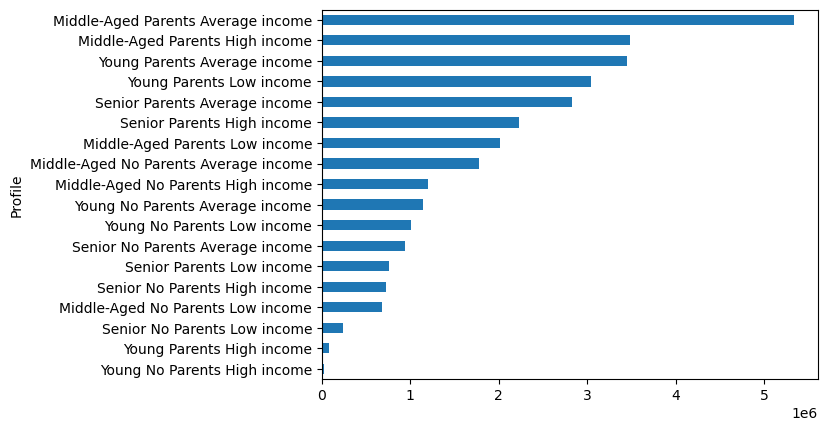

In [63]:
# 6. Create an appropriate visualization to show the distribution of profiles
# Bar Chart
bar_chart=df['Profile'].value_counts().sort_values(ascending=True).plot.barh()


In [64]:
# Export 
bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar Chart - Customer Profile.png'))

In [65]:
# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
Freq_Profile=df.groupby('Profile').agg({'days_since_prior_order':['min','mean', 'max']})
Freq_Profile

days_since_prior_order                 
                                                         min       mean   max
Profile                                                                      
Middle-Aged No Parents Average income                    0.0  10.711470  30.0
Middle-Aged No Parents High income                       0.0  10.673431  30.0
Middle-Aged No Parents Low income                        0.0  10.889697  30.0
Middle-Aged Parents Average income                       0.0  10.738238  30.0
Middle-Aged Parents High income                          0.0  10.830502  30.0
Middle-Aged Parents Low income                           0.0  11.084685  30.0
Senior No Parents Average income                         0.0  10.682421  30.0
Senior No Parents High income                            0.0  10.733952  30.0
Senior No Parents Low income                             0.0  11.356374  30.0
Senior Parents Average income                            0.0  10.807012  30.0
Senior Parents High income                               0.0  10.714439  30.0
Senior Parents Low income                                0.0  11.017993  30.0
Young No Parents Average income                          0.0  10.865531  30.0
Young No Parents High income                             0.0   9.963711  30.0
Young No Parents Low income                              0.0  10.958142  30.0
Young Parents Average income                             0.0  10.773913  30.0
Young Parents High income                                0.0  10.354875  30.0
Young Parents Low income                                 0.0  10.854063  30.0

In [66]:
Freq_Profile=df.groupby('Profile').agg({'prices':['min','mean', 'max']})
Freq_Profile

prices                
                                         min      mean   max
Profile                                                     
Middle-Aged No Parents Average income    1.0  7.966404  25.0
Middle-Aged No Parents High income       1.0  7.936756  25.0
Middle-Aged No Parents Low income        1.0  7.064197  25.0
Middle-Aged Parents Average income       1.0  7.959298  25.0
Middle-Aged Parents High income          1.0  7.953484  25.0
Middle-Aged Parents Low income           1.0  7.078014  25.0
Senior No Parents Average income         1.0  7.962155  25.0
Senior No Parents High income            1.0  7.949451  25.0
Senior No Parents Low income             1.0  6.712994  25.0
Senior Parents Average income            1.0  7.949848  25.0
Senior Parents High income               1.0  7.961292  25.0
Senior Parents Low income                1.0  6.704019  25.0
Young No Parents Average income          1.0  7.940811  25.0
Young No Parents High income             1.0  7.738318  25.0
Young No Parents Low income              1.0  7.600458  25.0
Young Parents Average income             1.0  7.952359  25.0
Young Parents High income                1.0  7.812762  25.0
Young Parents Low income                 1.0  7.595724  25.0

In [67]:
# 8.Compare your customer profiles with regions and departments.

In [68]:
# Create a crosstable for profile and region
crosstab_2 = pd.crosstab(df['Profile'], df['region'], dropna = False)

In [69]:
crosstab_2

region,Midwest,Northeast,South,West
Profile,,,,
Middle-Aged No Parents Average income,435606,285982,583248,473298
Middle-Aged No Parents High income,289990,193138,410546,302440
Middle-Aged No Parents Low income,157281,121442,232172,171127
Middle-Aged Parents Average income,1244305,932406,1791513,1371140
Middle-Aged Parents High income,841955,627487,1125279,892126
Middle-Aged Parents Low income,474359,358266,668936,510883
Senior No Parents Average income,230359,173484,306234,235300
Senior No Parents High income,162001,138012,230081,193739
Senior No Parents Low income,56025,45021,75756,59709


C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


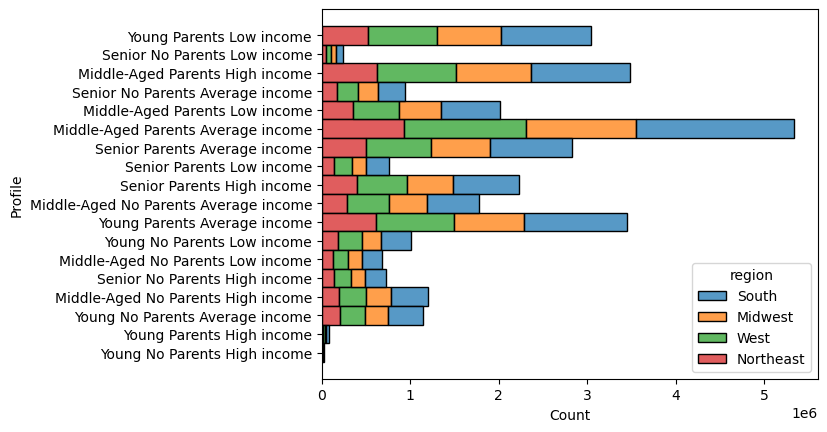

In [70]:
# Stacked plot of profile and region
histplot=sns.histplot(data=df, y='Profile',hue='region',multiple='stack')


In [71]:
histplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar Chart - Customer Profile by region.png'))

In [72]:
# Create a crosstable for profile and department_id
crosstab_3 = pd.crosstab(df['Profile'], df['department_id'])

In [73]:
crosstab_3

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
Profile,,,,,,,,,,,,,,,,,,,,,
Middle-Aged No Parents Average income,123451,1985,66630,538027,7805,15524,139768,5085,48779,1813,...,41477,102798,37360,59787,301165,37480,26607,136983,58367,3473
Middle-Aged No Parents High income,82725,1394,44715,352989,6887,10041,95718,3944,32365,1171,...,27157,71014,25746,40804,203807,26527,17498,93884,39220,2538
Middle-Aged No Parents Low income,43657,795,21971,183788,3244,4713,69919,1408,14644,744,...,9373,35604,16929,18360,106074,15747,5712,95412,22727,1396
Middle-Aged Parents Average income,369173,5883,193441,1609425,22801,45320,422365,16265,147568,5573,...,125458,313095,110118,179312,903019,119141,79202,413412,172215,11180
Middle-Aged Parents High income,242901,3844,131293,1034941,16873,29831,275897,10719,96670,3436,...,83246,206546,73017,121018,592481,78479,47168,269998,113336,7450
Middle-Aged Parents Low income,130257,2214,67289,535624,9941,14422,204430,5460,44056,2754,...,27905,105627,50772,53674,308071,50103,20578,283255,63643,4080
Senior No Parents Average income,65299,1027,34422,285943,3820,7924,74417,2763,26075,1028,...,22684,55065,19097,31363,161509,19529,13092,74455,31530,1815
Senior No Parents High income,51771,731,26349,218543,3412,6312,57896,2942,19751,638,...,16533,42807,14121,23619,120628,16680,9138,56958,23241,1398
Senior No Parents Low income,16061,241,7358,57793,1416,1345,26388,677,4599,277,...,2487,11261,6213,5672,36780,6173,1993,38591,7056,508


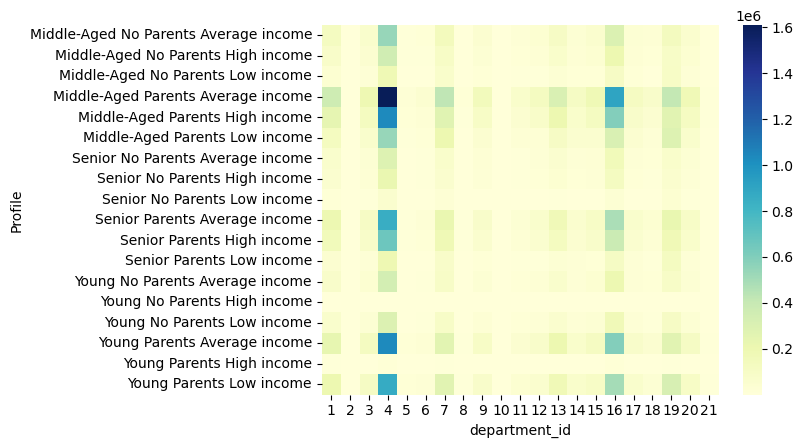

In [74]:
# Since there are 21 different departments and 18 profiles, a heat map could be the best choice to represent 
heat_map=sns.heatmap(crosstab_3, cmap='YlGnBu', fmt='g')


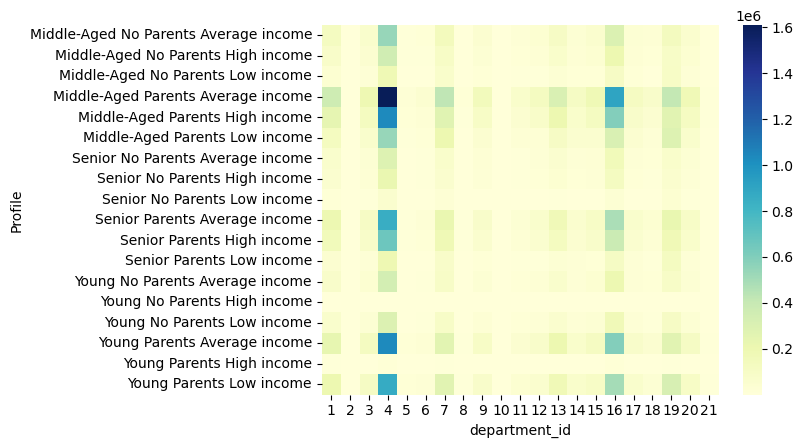

In [75]:
heat_map.figure

In [76]:
heat_map.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Heat Map - Profile and Department_id.png'))

In [77]:
# 9. Produce suitable charts to illustrate your results
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 39 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   Unnamed: 0_x                   int64   
 1   order_id                       int64   
 2   user_id                        int64   
 3   eval_set                       object  
 4   order_number                   int64   
 5   order_dow                      int64   
 6   order_hour_of_day              int64   
 7   days_since_prior_order         float64 
 8   product_id                     int64   
 9   add_to_cart_order              int64   
 10  reordered                      int64   
 11  Unnamed: 0_y                   int64   
 12  product_name                   object  
 13  aisle_id                       int64   
 14  department_id                  int64   
 15  prices                         float64 
 16  price_range                    object  
 17  busiest_days                  

Text(0.5, 1.0, 'Marital Status')

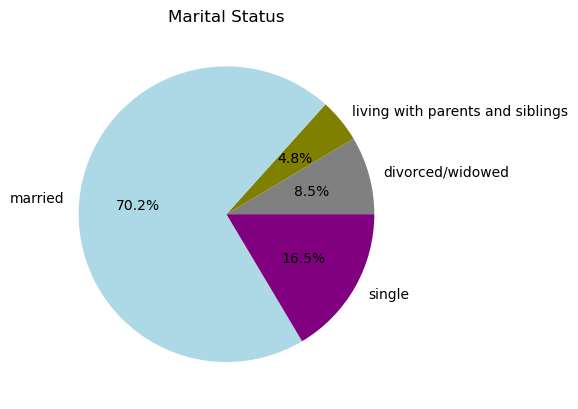

In [122]:
# Analysing Marital Status
marital_dist = (df['marital_status'].value_counts(normalize=True) * 100).sort_index()
marital_pie=plt.pie(marital_dist, labels=marital_dist.index, autopct='%1.1f%%', colors=['gray', 'olive', 'lightblue', 'purple'])
plt.title('Marital Status')

In [ ]:
# Analysing top 5 departments
department_counts = df['department_id'].value_counts()
department_counts

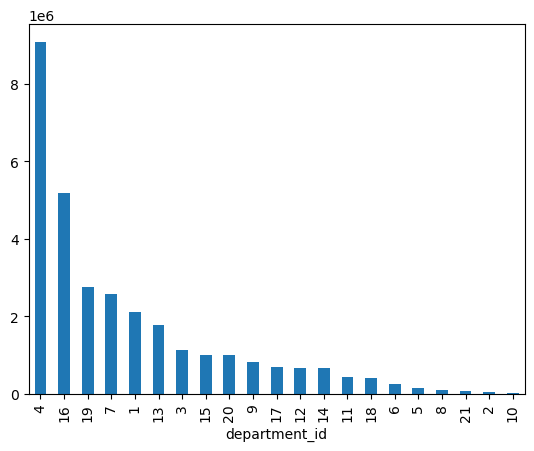

In [105]:
bar_chart2=df['department_id'].value_counts().sort_values(ascending=False).plot.bar()

In [108]:
# Export 
bar_chart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar Chart - Department number of orders.png'))

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

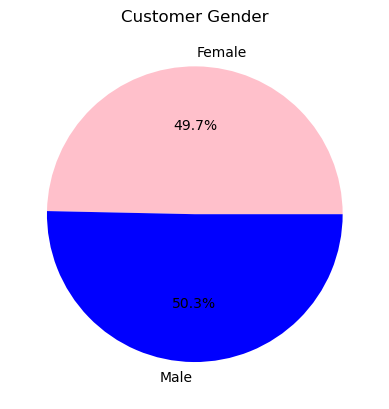

In [131]:
# Analysing Gender
gender_dist = (df['gender'].value_counts(normalize=True) * 100).sort_index()
gender=plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Customer Gender')
plt.figure

In [73]:
# Analysing Price range
# Creating price range group

In [68]:
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [69]:
df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,marital_status,income,_merge,region,activity,age_group,income_group,dependents_flag,Profile,price_range_loc
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,married,40423,both,South,high-activity,young,low-income,Yes,Young Parents Low income,Mid-range product
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,married,40423,both,South,high-activity,young,low-income,Yes,Young Parents Low income,Mid-range product
2,2,473747,1,prior,3,3,12,21.0,196,1,...,married,40423,both,South,high-activity,young,low-income,Yes,Young Parents Low income,Mid-range product
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,married,40423,both,South,high-activity,young,low-income,Yes,Young Parents Low income,Mid-range product
4,4,431534,1,prior,5,4,15,28.0,196,1,...,married,40423,both,South,high-activity,young,low-income,Yes,Young Parents Low income,Mid-range product


In [70]:
df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      393076
nan                       4877
Name: count, dtype: int64

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

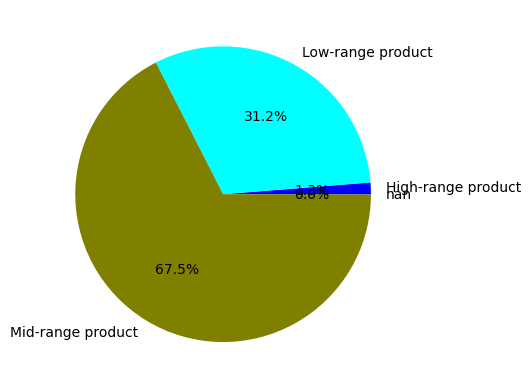

In [72]:
price_dist = (df['price_range_loc'].value_counts(normalize=True) * 100).sort_index()
price=plt.pie(price_dist, labels=price_dist.index, autopct='%1.1f%%', colors=['blue', 'cyan', 'olive'])
plt.figure

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

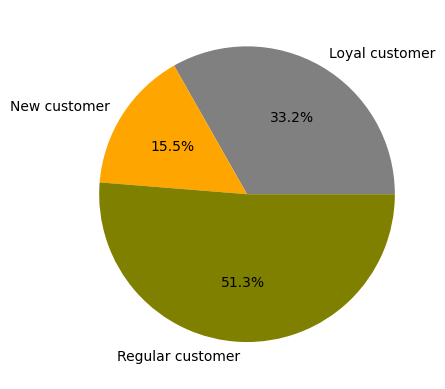

In [76]:
# Analysing Loyalty flag
loyalty_dist = (df['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()
loyalty=plt.pie(loyalty_dist, labels=loyalty_dist.index, autopct='%1.1f%%', colors=['gray', 'orange', 'olive'])
plt.figure

In [86]:
# Loyalty by region
loyalty_region = df.groupby(['region', 'loyalty_flag']).size().unstack()


<Axes: xlabel='region'>

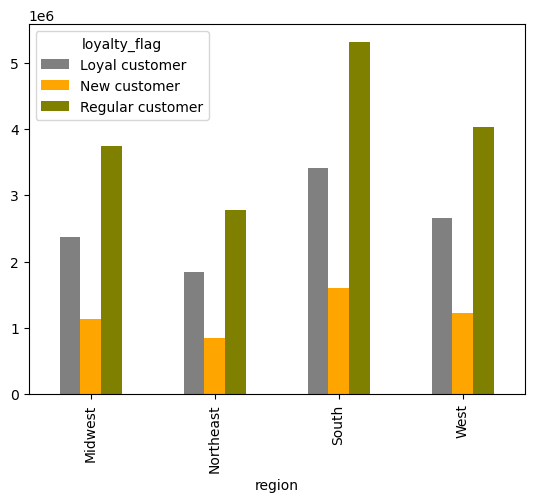

In [89]:
loyalty_region.plot(kind='bar', color=['gray', 'orange', 'olive','blue'])

Text(0.5, 1.0, 'Dependents')

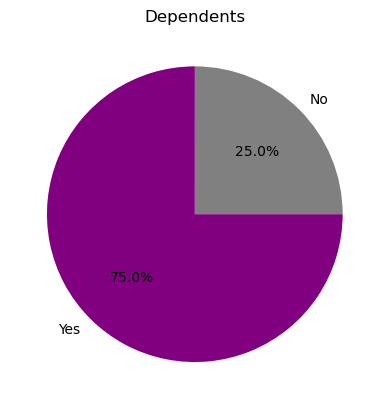

In [91]:
# Analysing Dependent
dependent_dist = (df['dependents_flag'].value_counts(normalize=True) * 100).sort_index()
dependent_pie=plt.pie(dependent_dist, labels=dependent_dist.index, autopct='%1.1f%%', colors=['gray', 'purple'])
plt.title('Dependents')

In [132]:
# 10. Export final data set
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4_10_Final_data_set.pkl'))